In [3]:
import os
import random

import imageio
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd

from vnc_networks import MANC, params
from vnc_networks.specific_neurons import (
    mdn_helper,
    motor_neurons_helper,
    sensory_neurons_helper,
)


In [4]:
# ----- Directories
manc_version = "v1.2"
MDN_DIR = "MDN_project"
FIG_DIR = MANC(manc_version).get_fig_dir()
MDN_FIGS = os.path.join(FIG_DIR, MDN_DIR)
os.makedirs(MDN_FIGS, exist_ok=True)

# Analysis choices
side = "RHS"
leg = "h"

# Save?
savefigs = False


# Visualise the neurons that we care about in the graph

In [5]:
CR = MANC(manc_version)
split_mdn_vnc = mdn_helper.get_vnc_split_MDNs_by_neuropil(
    not_connected=mdn_helper.get_mdn_bodyids()
)
_ = split_mdn_vnc.get_node_attribute([], "nt_type")
_ = split_mdn_vnc.get_node_attribute([], "type")

Loaded VNC Connections object with MDNs split by neuropil.
Attribute nt_type not found in the graph. Adding it.
Attribute type not found in the graph. Adding it.


In [6]:
# get the mdns
mdn_uids = mdn_helper.get_subdivided_mdns(
    split_mdn_vnc,
    neuropil=leg,
    # side=side,
)
mn_uids = motor_neurons_helper.get_leg_motor_neurons(
    split_mdn_vnc,
    leg=leg,
    # side=side,
)

In [7]:
# Get the key premotor neurons
premotor_df = pd.read_csv(
    os.path.join(MDN_FIGS, "motor_clusters_right_hind_leg_MDN_premotor_hubs.csv"),
)
pmn_bodyids = premotor_df["body_id"].values
pmn_uids = split_mdn_vnc.get_uids_from_bodyids(
    pmn_bodyids
)  # should match the "uid" column, but in case we change the connection loaded this is safer
pmn_df = split_mdn_vnc.list_neuron_properties(pmn_uids)
pmn_df

,body_id,node_label,class_1,node_class,nt_type,type,uid
7024,10372,IN19A003,intrinsic,intrinsic,gaba,IN19A003,7024
9431,11819,IN08A006,intrinsic,intrinsic,gaba,IN08A006,9431
9595,10380,IN09A002,intrinsic,intrinsic,gaba,IN09A002,9595
11907,11325,IN21A010,intrinsic,intrinsic,acetylcholine,IN21A010,11907
15581,10425,IN13B006,intrinsic,intrinsic,gaba,IN13B006,15581
19455,10677,INXXX464,intrinsic,intrinsic,acetylcholine,INXXX464,19455
21924,10513,INXXX053,intrinsic,intrinsic,gaba,INXXX053,21924


In [ ]:
# experimentally known neurons
lbl40 = split_mdn_vnc.get_neuron_ids({'type': 'LBL40'})
lbl40_df = split_mdn_vnc.list_neuron_properties(lbl40)
print(lbl40_df)
lul130 = split_mdn_vnc.get_neuron_ids({'type': 'INXXX468'})
lul130_df = split_mdn_vnc.list_neuron_properties(lul130)
print(lul130_df)
dna11 = split_mdn_vnc.get_neuron_ids({'type': 'DNa11'})
dna11_df = split_mdn_vnc.list_neuron_properties(dna11)
print(dna11_df)
exp_neurons = list(set(lbl40) | set(lul130) | set(dna11))

       body_id node_label    class_1 node_class        nt_type   type    uid
17753    11493   IN07B105  intrinsic  intrinsic  acetylcholine  LBL40  17753
19180    10994   IN07B105  intrinsic  intrinsic  acetylcholine  LBL40  19180
       body_id node_label    class_1 node_class        nt_type      type  \
3178     14650   INXXX468  intrinsic  intrinsic  acetylcholine  INXXX468   
3297     13511   INXXX468  intrinsic  intrinsic  acetylcholine  INXXX468   
3703     14084   INXXX468  intrinsic  intrinsic  acetylcholine  INXXX468   
4971     14230   INXXX468  intrinsic  intrinsic  acetylcholine  INXXX468   
5095     14432   INXXX468  intrinsic  intrinsic  acetylcholine  INXXX468   
7657     13293   INXXX468  intrinsic  intrinsic  acetylcholine  INXXX468   
7671     13323   INXXX468  intrinsic  intrinsic  acetylcholine  INXXX468   
10656    13246   INXXX468  intrinsic  intrinsic  acetylcholine  INXXX468   
18042    30260   INXXX468  intrinsic  intrinsic  acetylcholine  INXXX468   
18757    

Attribute class_1 not found in the graph. Adding it.


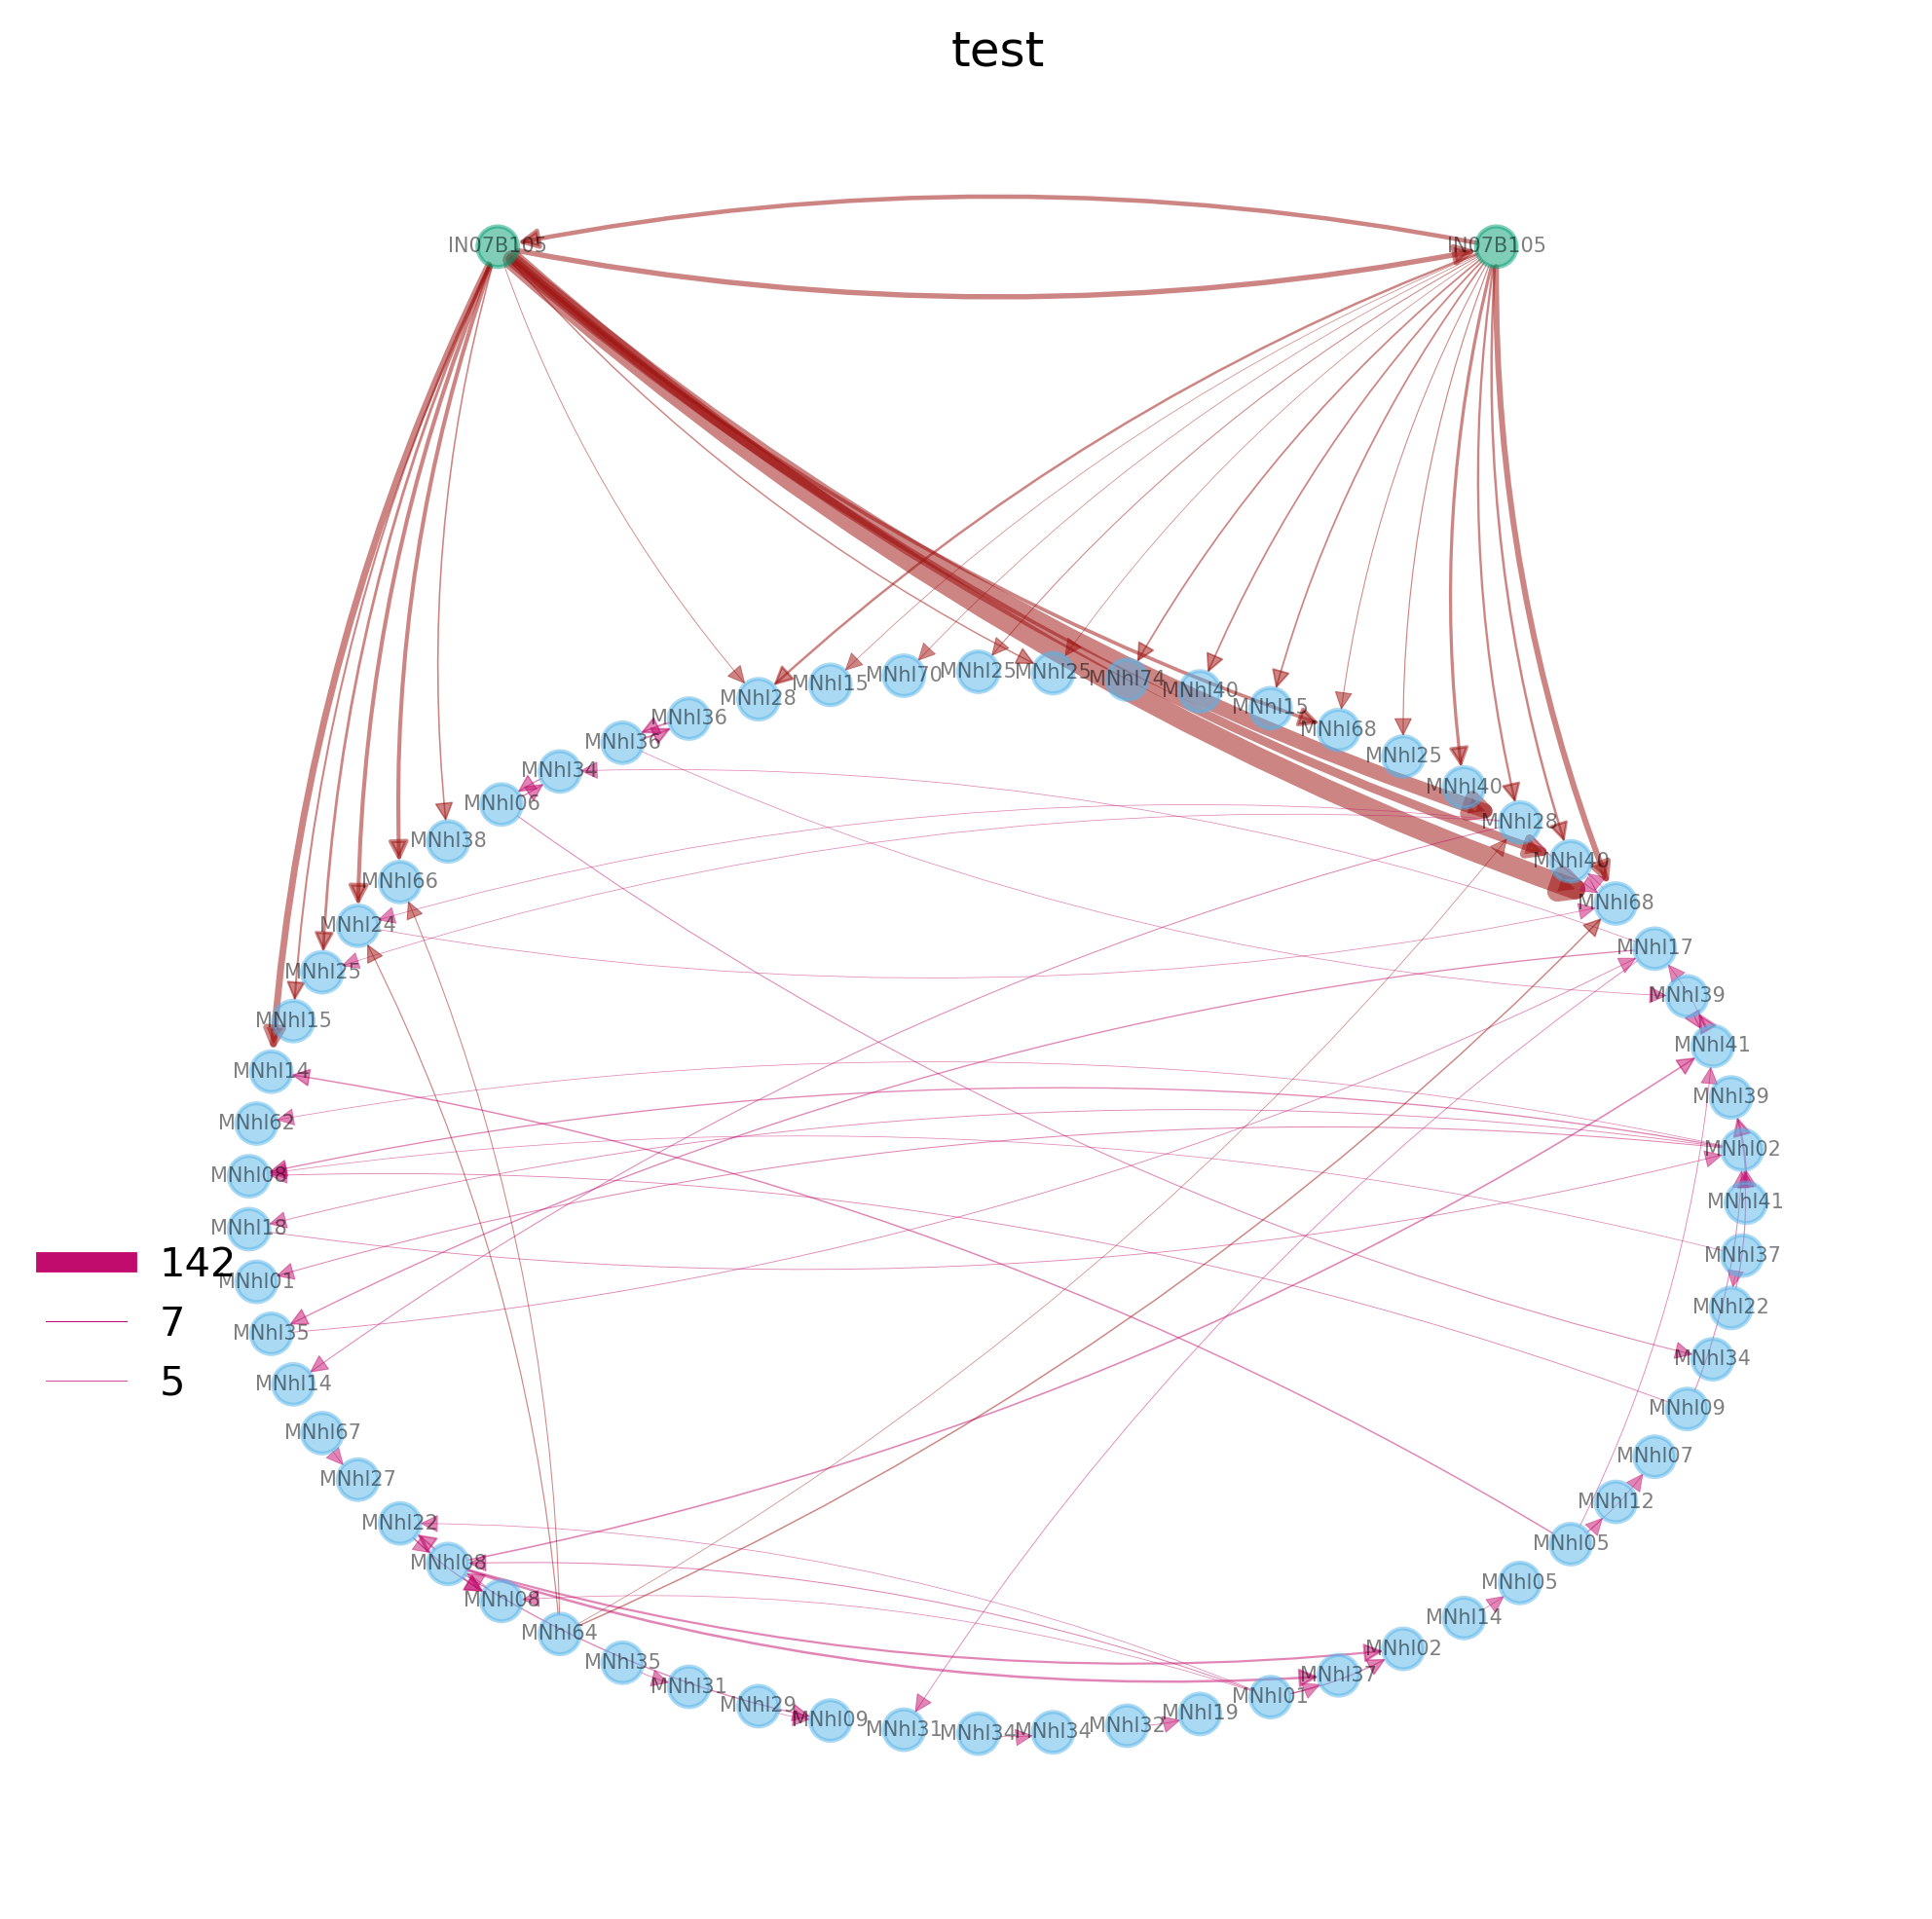

In [16]:
# What are the direct connections from the experiemtnally known neurons to motor neurons?
exp_mn_subgraph = split_mdn_vnc.subgraph(list(mn_uids) + lbl40)

_ = exp_mn_subgraph.draw_graph_in_out_center_circle(
    input_nodes=lbl40,
    output_nodes=[],
    save=False,
    label_nodes=True,
    syn_threshold=5,
)

plt.show()

LUL130  (almost) don't project to motor neurons.
LBL40 projects to the following motor neurons:
14: cluster 0, (acc tr fl)
15: cluster 4, (ltm2-femur)
24: cluster 4, (Acc. ti flexor)
25: cluster 0, (Acc. ti flexor)
28: cluster 4, (Acc. ti flexor)
38: cluster 0, (ltm1-tibia)
40: cluster 4, (Ti flexor)
66: cluster 4 (hl)
68: cluster 4 (hl)
70: unclusterd, connection 5 synapses
74: unclusterd, connection 6 synapses
=> Only to clusters 0 and 4

In [10]:
# Get the relevant neurons
selected_nodes = set(pmn_uids) | set(exp_neurons) # | set(mdn_uids) | set(mn_uids)  # 
selected_nodes = list(selected_nodes)

In [11]:
subgraph = split_mdn_vnc.subgraph(selected_nodes)

Attribute class_1 not found in the graph. Adding it.


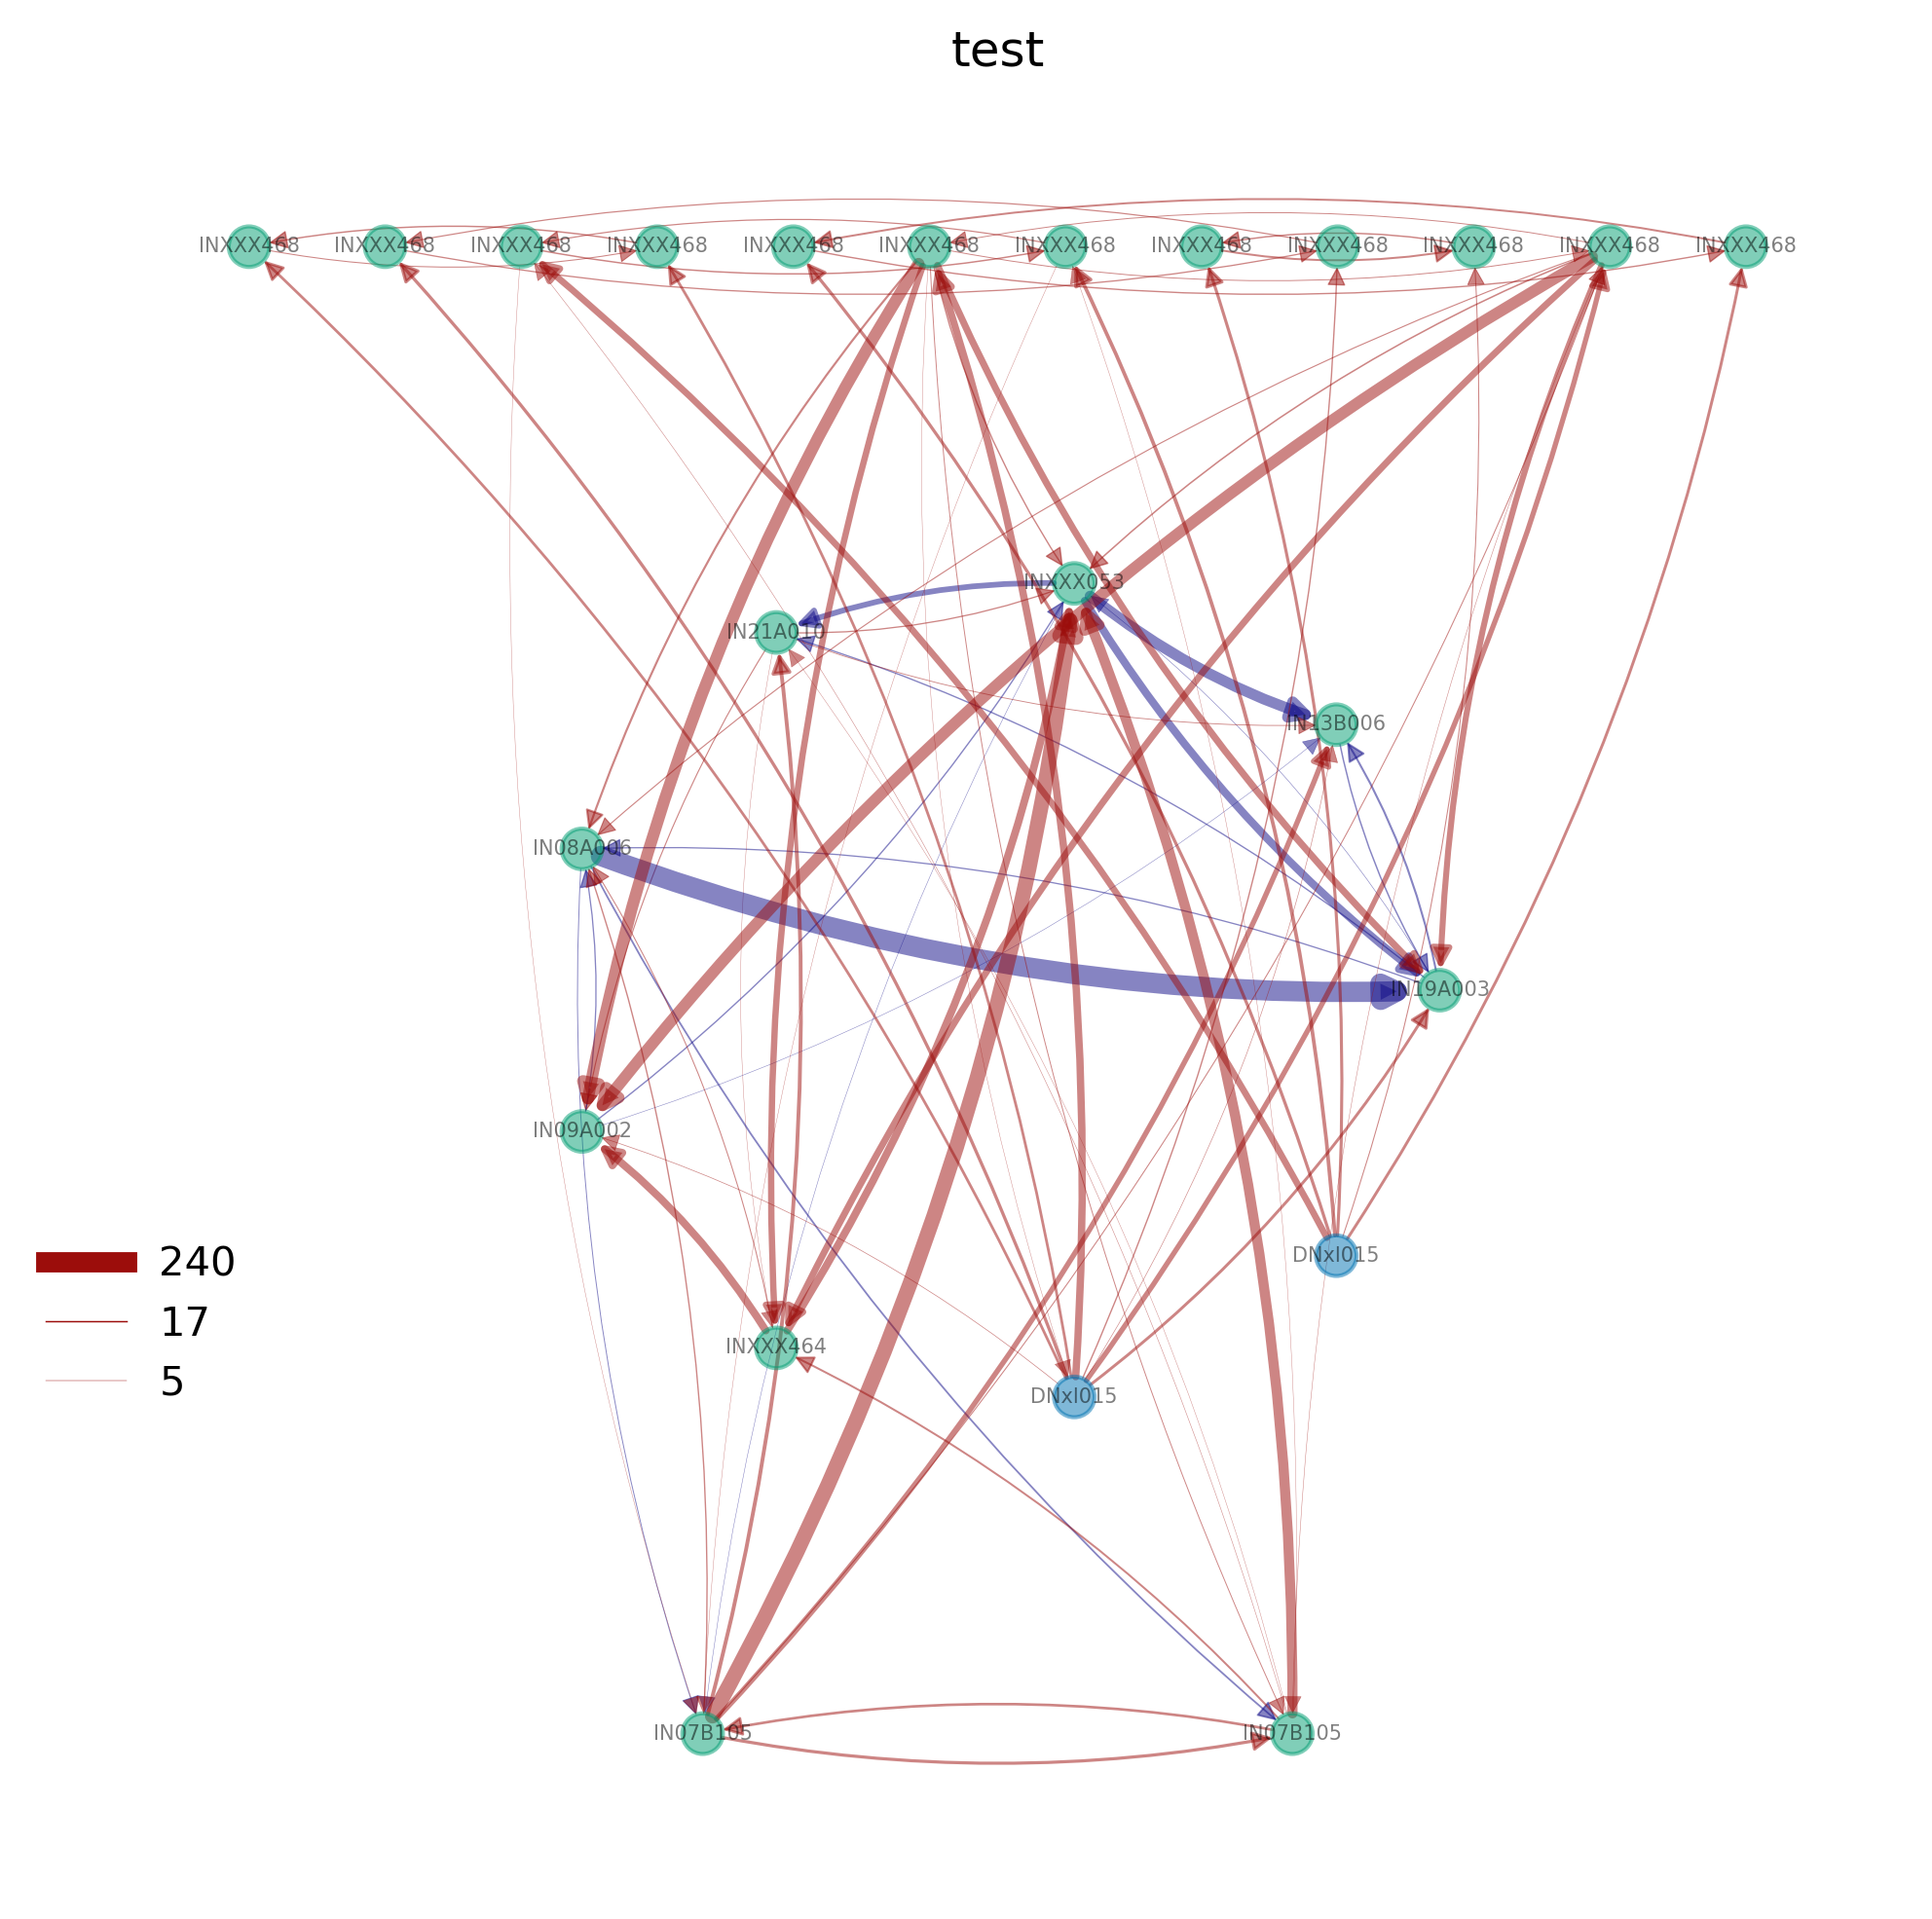

In [12]:
_ = subgraph.draw_graph_in_out_center_circle(
    input_nodes=lul130,
    output_nodes=lbl40,
    save=False,
    label_nodes=True,
    syn_threshold=5,
)

if savefigs:
    plt.savefig(
        os.path.join(MDN_FIGS, f"MDN_premotor_{leg}_leg_{side}_subgraph.pdf"),
        bbox_inches="tight",
        dpi=300,
    )

plt.show()
